In [ ]:
# import packages and read in the data
import pandas as pd
YEAR = 2020

data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                   'play_by_play_' + str(YEAR) + '.csv.gz?raw=True',
                   compression='gzip', low_memory=False)

data.head()

In [ ]:
# cleaning the data
data = data.loc[data.season_type=='REG']

data = data.loc[(data.play_type.isin(['no_play','pass','run'])) & (data.epa.isna()==False)]

data.loc[data['pass']==1, 'play_type'] = 'pass'
data.loc[data.rush==1, 'play_type'] = 'run'

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
# importing multiple seasons

YEARS = [2018,2019,2020]

data = pd.DataFrame()

for i in YEARS:  
    i_data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(i) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    data = data.append(i_data, sort=True)

In [ ]:
# import data for plotting

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data.reset_index(drop=True, inplace=True)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)

In [ ]:
# Getting team logos and colors

#import packages
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#download logos
#urls = pd.read_csv('https://raw.githubusercontent.com/statsbylopez/BlogPosts/master/nfl_teamlogos.csv')

#for i in range(0,len(urls)):
    #urllib.request.urlretrieve(urls['url'].iloc[i], os.getcwd() + '/logos/' + urls['team_code'].iloc[i] + '.png')
    
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.5)

# function to put logos in chart
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.5)

# storing logo information
logos = os.listdir(os.getcwd() + '/logos')

logo_paths = []

for i in logos:
    logo_paths.append(os.getcwd() + '/logos/' + str(i))
    
# team colors
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [ ]:
# complex method for chart plotting
#Filter to pass plays and groupby offensive team
team_epa = data.loc[data['pass']==1].groupby('posteam')[['epa']].mean()

#Do the same but for rushing plays
team_epa['rush_epa'] = data.loc[data.rush==1].groupby('posteam')[['epa']].mean()

#Define x and y
x = team_epa.rush_epa
y = team_epa.epa

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(15,15))

#Create a scatter plot first to ge the points for the logos
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text
ax.set_xlabel('EPA per Rush', fontsize=16)
ax.set_ylabel('EPA per Dropback', fontsize=16)
ax.set_title('Avg. EPA by Team & Play Type - 2020', fontsize=20)
plt.figtext(.81, .07, 'Data: nflfastR', fontsize=12)

#Save the figure as a png
plt.savefig('team_epas.png', dpi=400)

In [ ]:
# plot example

rush_epa = data.epa.loc[data.play_type=='run']
pass_epa = data.epa.loc[data.play_type=='pass']

#Create figure and enter in a figsize
plt.figure(figsize=(12,8))

#Place a histogram on the figure with the EPA of all pass plays
#Bins are how many groupings or buckets the data will be split into
#Assign a label for the legend and choose a color
plt.hist(pass_epa, bins=25, label='Pass', color='slategrey')

#Place a second histogram this time for rush plays, 
#The alpha < 1 will make this somewhat transparent
plt.hist(rush_epa, bins=25, label='Run', alpha=.7, color='lime')

#Add labels and title
plt.xlabel('Expected Points Added',fontsize=12)
plt.ylabel('Number of Plays',fontsize=12)
plt.title('EPA Distribution Based on Play Type',fontsize=14)

#Add source, the first two numbers are x and y 
#coordinates as a decimal of the whole image
plt.figtext(.8,.04,'Data: nflfastR', fontsize=10)

#Add a legend
plt.legend()

#Save the figure as a png
plt.savefig('epa_dist.png', dpi=400)

In [ ]:
# Offensive EPA
data.groupby('posteam')[['epa']].mean().sort_values('epa', ascending=False).head()

In [1]:
import pandas as pd

In [3]:
#Cleaning data
data = data.loc[data.season_type=='REG']

data = data.loc[(data.play_type.isin(['no_play','pass','run'])) & (data.epa.isna()==False)]

data.loc[data['pass']==1, 'play_type'] = 'pass'
data.loc[data.rush==1, 'play_type'] = 'run'

data.reset_index(drop=True, inplace=True)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
YEARS = [2019,2020]

data = pd.DataFrame()

for i in YEARS:  
    i_data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(i) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    data = data.append(i_data, sort=True)

In [5]:
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.5)

logos = os.listdir(os.getcwd() + '/logos')

logo_paths = []

for i in logos:
    logo_paths.append(os.getcwd() + '/logos/' + str(i))

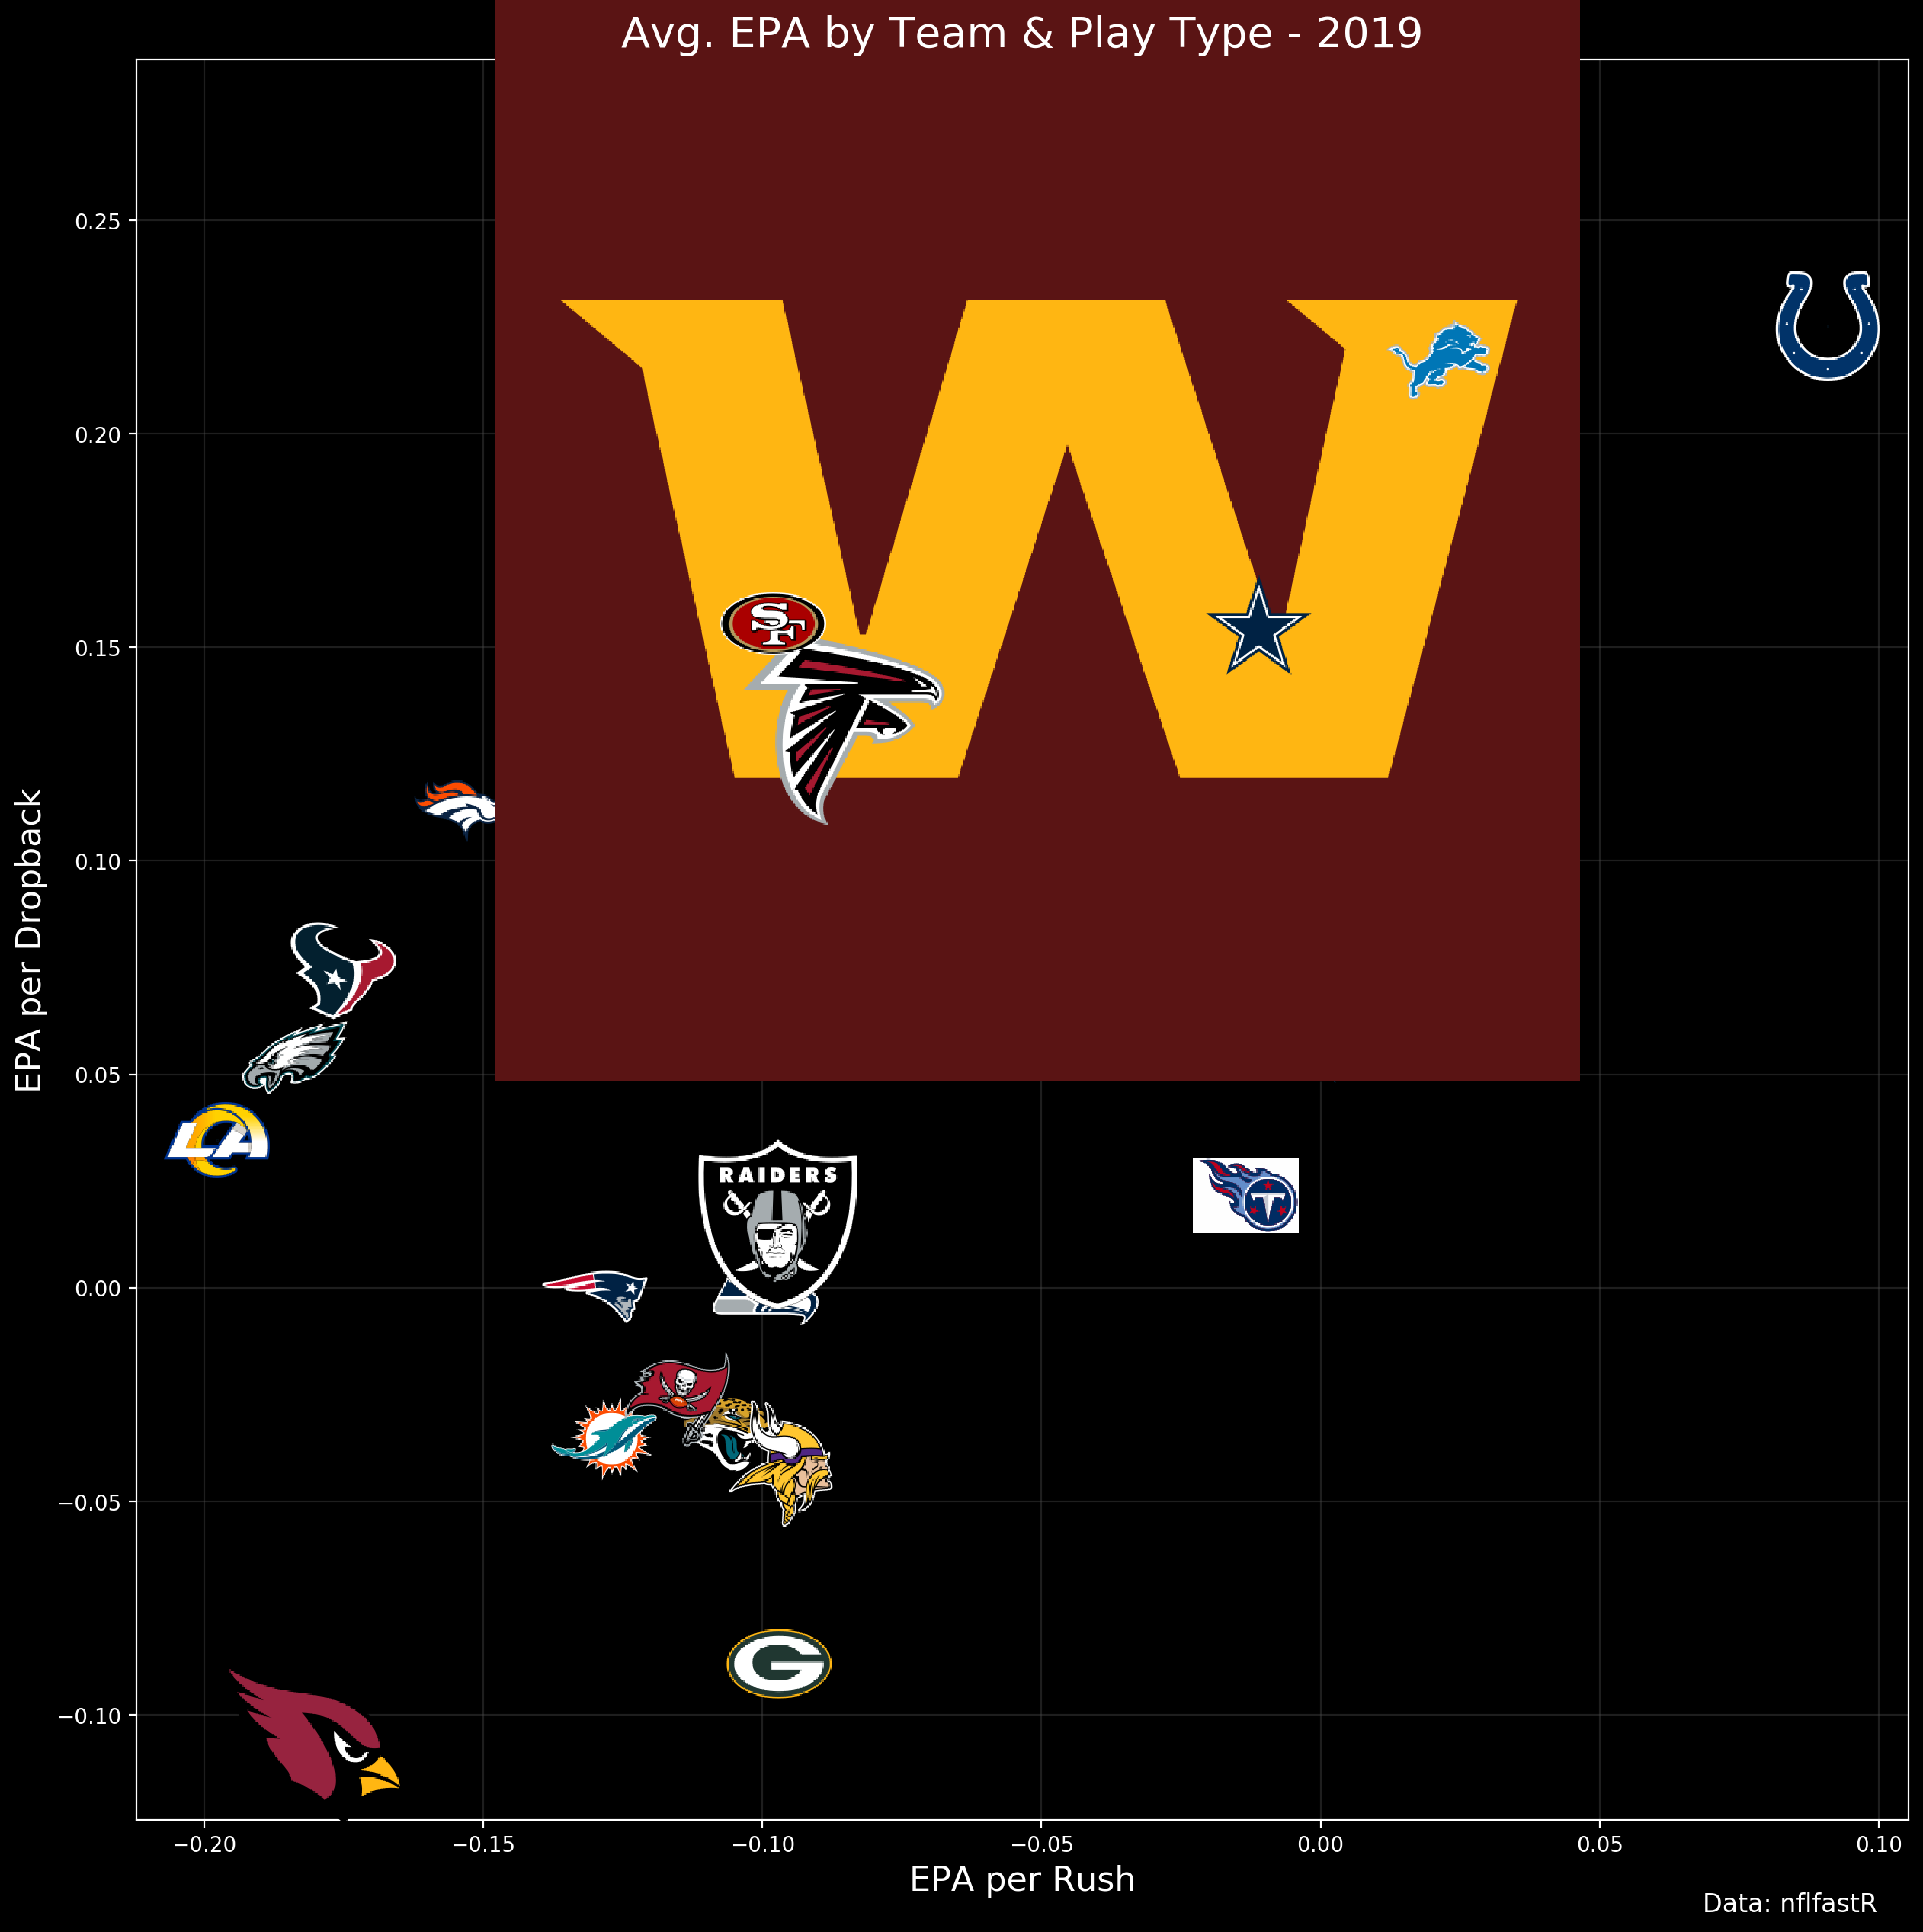

In [6]:

#Filter to pass plays and groupby offensive team
team_epa = data.loc[data['pass']==1].groupby('posteam')[['epa']].mean()

#Do the same but for rushing plays
team_epa['rush_epa'] = data.loc[data.rush==1].groupby('posteam')[['epa']].mean()

#Define x and y
x = team_epa.rush_epa
y = team_epa.epa

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(15,15))

#Make a scatter plot first to get the points to place logos
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text
ax.set_xlabel('EPA per Rush', fontsize=16)
ax.set_ylabel('EPA per Dropback', fontsize=16)
ax.set_title('Avg. EPA by Team & Play Type - 2019', fontsize=20)
plt.figtext(.81, .07, 'Data: nflfastR', fontsize=12)

#Save the figure as a png
plt.savefig('team_epas.png', dpi=400)